In [1]:
import histogram_manager as hm
import ROOT
import utils

Welcome to JupyROOT 6.30/04


In [2]:
hists = hm.HistogramManager("../output/BR_Cd.root")
hists

<HistogramManager(filename='../output/BR_Cd.root', total_objects=41)>


Name               | Type  
----------------------------
hEn                | 📂 TH1D
hEgam              | 📊 TH1D
hEn_gate477        | 📊 TH1D
hEn_gate9394       | 📊 TH1D
hEn_gate9394_SE    | 📊 TH1D
hEn_gate9394_SEbkg | 📊 TH1D
hEn_gate9394bkg    | 📊 TH1D
hEn_ge2MeV         | 📊 TH1D
hPulseHeight       | 📊 TH1D
hTOF_mus           | 📊 TH1D

In [3]:
# regions = {
#     "hEn_gate9394": [9316, 9408],
#     "hEn_gate9394bkg": [9474, 9694],
#     "hEn_gate9394SE": [8860, 8892],
#     "hEn_gate9394SEbkg": [8908, 8968],
# }

# regions = {
#     "hEn_gate9394": [9316, 9408],
#     "hEn_gate9394bkg": [9474, 9694],
# }

# gates = ["hEn_gate9394","hEn_gate9394SE"]

In [4]:
# for gate in gates:
#     hist = hists.get(gate)
#     hist_bkg = hists.get(gate+'bkg')

In [5]:
hEgam = hists.get("hEgam")

[0.4753725228516223]
[]


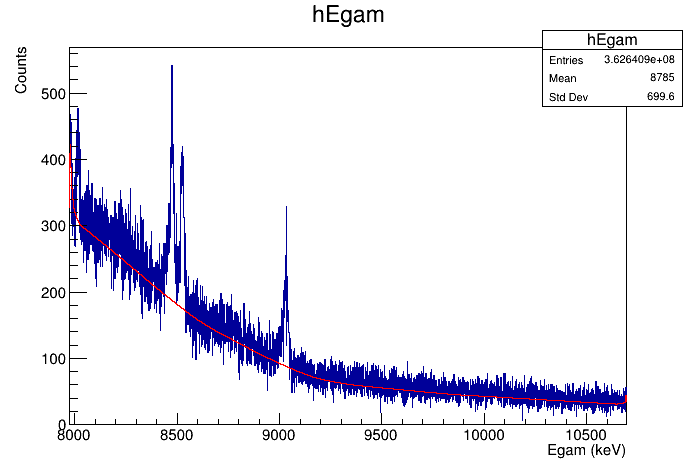

In [6]:
%jsroot off

gate = [9316,9408]
gate_bkg = [9474,9694]

# gate = [8805,8897]   # SE
# gate_bkg = [8900,8950]

# gate_SE = [8860,8892]
# gate_bkg_SE = [8908,8968]

canvas_list = []
scale_list = []
scale_list_SE = []



# for key, hEgam in hEgam_dict.items():
    
            
#     c = ROOT.TCanvas()
    
#     hEgam.GetXaxis().SetRangeUser(gate_bkg[0]-1500,gate_bkg[1]+1000)
#     hEgam.Draw()
#     hEgam_bkg = hEgam.ShowBackground(80)
    
#     try:     
#         num = hEgam_bkg.Integral(hEgam_bkg.GetXaxis().FindBin(gate[0]),hEgam_bkg.GetXaxis().FindBin(gate[1]))
#         dem = hEgam_bkg.Integral(hEgam_bkg.GetXaxis().FindBin(gate_bkg[0]),hEgam_bkg.GetXaxis().FindBin(gate_bkg[1]))
#         scale = num/dem
#     except ZeroDivisionError:
#         scale = 0
        
#     # try:     
#     #     num_SE = hEgam_bkg.Integral(hEgam_bkg.GetXaxis().FindBin(gate_SE[0]),hEgam_bkg.GetXaxis().FindBin(gate_SE[1]))
#     #     dem_SE = hEgam_bkg.Integral(hEgam_bkg.GetXaxis().FindBin(gate_bkg_SE[0]),hEgam_bkg.GetXaxis().FindBin(gate_bkg_SE[1]))
#     #     scale_SE = num_SE/dem_SE
#     # except ZeroDivisionError:
#     #     scale_SE = 0
        
    
#     canvas_list.append(c)
#     scale_list.append(scale)
#     # scale_list_SE.append(scale_SE)


        
c = ROOT.TCanvas()

hEgam.GetXaxis().SetRangeUser(gate_bkg[0]-1500,gate_bkg[1]+1000)
hEgam.Draw()
hEgam_bkg = hEgam.ShowBackground(80)

try:     
    num = hEgam_bkg.Integral(hEgam_bkg.GetXaxis().FindBin(gate[0]),hEgam_bkg.GetXaxis().FindBin(gate[1]))
    dem = hEgam_bkg.Integral(hEgam_bkg.GetXaxis().FindBin(gate_bkg[0]),hEgam_bkg.GetXaxis().FindBin(gate_bkg[1]))
    scale = num/dem
except ZeroDivisionError:
    scale = 0
    
# try:     
#     num_SE = hEgam_bkg.Integral(hEgam_bkg.GetXaxis().FindBin(gate_SE[0]),hEgam_bkg.GetXaxis().FindBin(gate_SE[1]))
#     dem_SE = hEgam_bkg.Integral(hEgam_bkg.GetXaxis().FindBin(gate_bkg_SE[0]),hEgam_bkg.GetXaxis().FindBin(gate_bkg_SE[1]))
#     scale_SE = num_SE/dem_SE
# except ZeroDivisionError:
#     scale_SE = 0
        
    
canvas_list.append(c)
scale_list.append(scale)
#     # scale_list_SE.append(scale_SE)

                
            
print(scale_list)
print(scale_list_SE)
ROOT.gROOT.GetListOfCanvases().Draw()        

In [7]:
hEn_gatebkg = hists.get("hEn_gate9394bkg")


scaled_dict = {}


key_scaled = utils.rename_string("hEn_gate9394bkg", "scaled")

hist_scaled = hEn_gatebkg.Clone()
hist_scaled.SetTitle(key_scaled)
hist_scaled.SetName(key_scaled)
hist_scaled.Scale(scale_list[0])

scaled_dict["hEn_gate9394bkg_scaled"] = hist_scaled

hists_scaled = hm.HistogramManager(scaled_dict)
hists_scaled.write("../output/BR_Cd_bkg.root")

In [8]:
# %jsroot on

# c = hists.plot_folder("hEn_gate9394bkg",2,30)
# c.Draw()

# c1 = hists_scaled.plot("hEn_gate9394bkg_scaled",2,30)

# for canvas in c1:
#     canvas.Draw()

# ROOT.gROOT.GetListOfCanvases().Draw()